In [23]:
# Import required libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read in and preview the dataset
crimes=pd.read_csv('Crimes_07_07_2025.csv')
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13884078,JJ313505,06/29/2025 12:00:00 AM,011XX W HUBBARD ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,27,24.0,06,1168904.0,1903239.0,2025,07/06/2025 03:42:52 PM,41.890009,-87.655159,POINT (-87.655159024 41.890009229)
1,13884266,JJ314316,06/29/2025 12:00:00 AM,028XX W HARRISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,28,27.0,07,1157490.0,1897240.0,2025,07/06/2025 03:42:52 PM,41.873787,-87.697240,POINT (-87.697239664 41.873787297)
2,13888381,JJ319317,06/29/2025 12:00:00 AM,028XX N LEAVITT ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,False,True,...,32,5.0,26,1161665.0,1918780.0,2025,07/06/2025 03:42:52 PM,41.932809,-87.681310,POINT (-87.681309962 41.932808787)
3,13887490,JJ317933,06/29/2025 12:00:00 AM,060XX N TROY ST,0810,THEFT,OVER $500,STREET,False,False,...,50,2.0,06,1154256.0,1940387.0,2025,07/06/2025 03:42:52 PM,41.992251,-87.707958,POINT (-87.707957882 41.992251137)
4,13888566,JJ319663,06/29/2025 12:00:00 AM,015XX N WESTERN AVE,0810,THEFT,OVER $500,APARTMENT,False,False,...,1,24.0,06,1160130.0,1910141.0,2025,07/06/2025 03:42:52 PM,41.909135,-87.687190,POINT (-87.68719015 41.90913465)


In [25]:
# Extract the first two digits hours from "Date" and converted to 24 hours format
crimes['Date'] =pd.to_datetime(crimes['Date'], format='%m/%d/%Y %I:%M:%S %p')
crimes['Hour'] =crimes['Date'].dt.hour
print(crimes['Hour'])

0         0
1         0
2         0
3         0
4         0
         ..
112526    0
112527    0
112528    0
112529    0
112530    0
Name: Hour, Length: 112531, dtype: int32


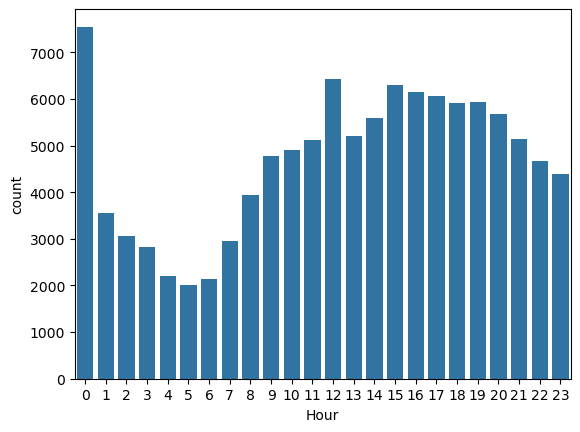

In [27]:
#Produce a countplot to find the largest frequency of crtimes by hour and store it in a variable
sns.countplot(data=crimes,x='Hour')
peak_crime_hour=12

In [29]:
# Filter for nightime hours between 10pm and 3:59am
# 3 = crimes between 3am and 3:59am 
night_time= crimes[crimes['Hour'].isin([22,23,0,1,2,3])]
night_time.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour
0,13884078,JJ313505,2025-06-29,011XX W HUBBARD ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,24.0,06,1168904.0,1903239.0,2025,07/06/2025 03:42:52 PM,41.890009,-87.655159,POINT (-87.655159024 41.890009229),0
1,13884266,JJ314316,2025-06-29,028XX W HARRISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,27.0,07,1157490.0,1897240.0,2025,07/06/2025 03:42:52 PM,41.873787,-87.697240,POINT (-87.697239664 41.873787297),0
2,13888381,JJ319317,2025-06-29,028XX N LEAVITT ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,False,True,...,5.0,26,1161665.0,1918780.0,2025,07/06/2025 03:42:52 PM,41.932809,-87.681310,POINT (-87.681309962 41.932808787),0
3,13887490,JJ317933,2025-06-29,060XX N TROY ST,0810,THEFT,OVER $500,STREET,False,False,...,2.0,06,1154256.0,1940387.0,2025,07/06/2025 03:42:52 PM,41.992251,-87.707958,POINT (-87.707957882 41.992251137),0
4,13888566,JJ319663,2025-06-29,015XX N WESTERN AVE,0810,THEFT,OVER $500,APARTMENT,False,False,...,24.0,06,1160130.0,1910141.0,2025,07/06/2025 03:42:52 PM,41.909135,-87.687190,POINT (-87.68719015 41.90913465),0


In [31]:
# Group by "Block" and count occurrences
count_crime_location = night_time.groupby('Block',as_index=False)['Hour'].count()
print(count_crime_location)

#Sorting count_crime_location in descending order (highest to lowest) 
sorted_crime_location = count_crime_location.sort_values('Hour',ascending=False)['Block']
print(sorted_crime_location)

# Filtering the largest value from sorted crime location and assign a new variable
peak_night_crime_location= sorted_crime_location.iloc[0]
print(peak_night_crime_location) 

                      Block  Hour
0          0000X E 100TH PL     2
1          0000X E 101ST PL     1
2          0000X E 101ST ST     4
3          0000X E 102ND ST     1
4          0000X E 103RD PL     2
...                     ...   ...
12678   135XX S BUFFALO AVE     1
12679    135XX S BURLEY AVE     1
12680  135XX S MACKINAW AVE     1
12681  135XX S TORRENCE AVE     1
12682      137XX S AVENUE O     2

[12683 rows x 2 columns]
429       001XX W HUBBARD ST
6106        035XX N CLARK ST
207      0000X W DIVISION ST
5852      033XX N HALSTED ST
215       0000X W HUBBARD ST
                ...         
7437         045XX W 59TH ST
7435         045XX W 53rd St
7434    045XX S WOODLAWN AVE
3182       015XX W GRAND AVE
6341         036XX W 79TH ST
Name: Block, Length: 12683, dtype: object
001XX W HUBBARD ST


In [33]:
# Group crimes data by 'Block' and 'Hour', count occurrences in each group
# Reset the index to convert the groupby result to a DataFrame
# Name the count column as 'Crimes Counts'
crime_per_block=crimes.groupby(['Block','Hour']).size().reset_index(name='Crimes Counts')
print(crime_per_block)  # Display the resulting DataFrame showing crime counts for each block and hour

                      Block  Hour  Crimes Counts
0          0000X E 100TH PL     0              1
1          0000X E 100TH PL     1              1
2          0000X E 100TH ST    12              1
3          0000X E 100TH ST    21              1
4          0000X E 101ST PL    11              1
...                     ...   ...            ...
85135  137XX S BRAINARD AVE    10              1
85136  137XX S BRAINARD AVE    14              1
85137  137XX S BRAINARD AVE    16              1
85138  137XX S BRAINARD AVE    18              1
85139  137XX S BRAINARD AVE    19              1

[85140 rows x 3 columns]


In [35]:
# Sort the crime_per_block dataframe by Hour (ascending) and Crimes Counts (descending)
peak_crime_per_block=crime_per_block.sort_values(['Hour', 'Crimes Counts'], ascending=[True,False])
print(peak_crime_per_block)

                       Block  Hour  Crimes Counts
40532     033XX N HALSTED ST     0             19
42246       035XX N CLARK ST     0             17
4163        002XX E HURON ST     0             16
1768     0000X W DIVISION ST     0             12
3619      001XX W HUBBARD ST     0             11
...                      ...   ...            ...
85011  133XX S BALTIMORE AVE    23              1
85037    133XX S CORLISS AVE    23              1
85063    133XX S LANGLEY AVE    23              1
85110    135XX S BRANDON AVE    23              1
85131       137XX S AVENUE O    23              1

[85140 rows x 3 columns]


In [37]:
# Group by Hour and select the first row of each group (which will be the location with most crimes)
# This effectively finds the top crime location for each hour of the day
top_locations_per_hour = peak_crime_per_block.groupby('Hour').first().reset_index()
print('The location with the most crimes for each hours:')
top_locations_per_hour

The location with the most crimes for each hours:


,Hour,Block,Crimes Counts
0,0,033XX N HALSTED ST,19
1,1,033XX N HALSTED ST,17
2,2,0000X W DIVISION ST,14
3,3,0000X W HUBBARD ST,11
4,4,007XX N MICHIGAN AVE,8
5,5,0000X W TERMINAL ST,11
6,6,0000X W TERMINAL ST,11
7,7,086XX S COTTAGE GROVE AVE,19
8,8,086XX S COTTAGE GROVE AVE,25
9,9,047XX W NORTH AVE,11
